# Import & Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv('titanic_data.csv')

# Exploratory Data Analysis

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info() # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe() # describe from numeric data, not all are described like PassengerId

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.describe(include=object) # describe from categorcial data

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### How many survived?

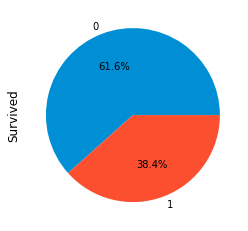

In [ ]:
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%')

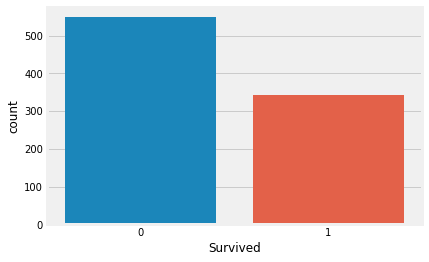

In [ ]:
sns.countplot('Survived', data=data)

*Not many passengers survived. Of the 891 passengers on the dataset, only about 350 survived, which is only **38.4%***

### Analysing The Features

##### Sex --> Categorical Feature

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

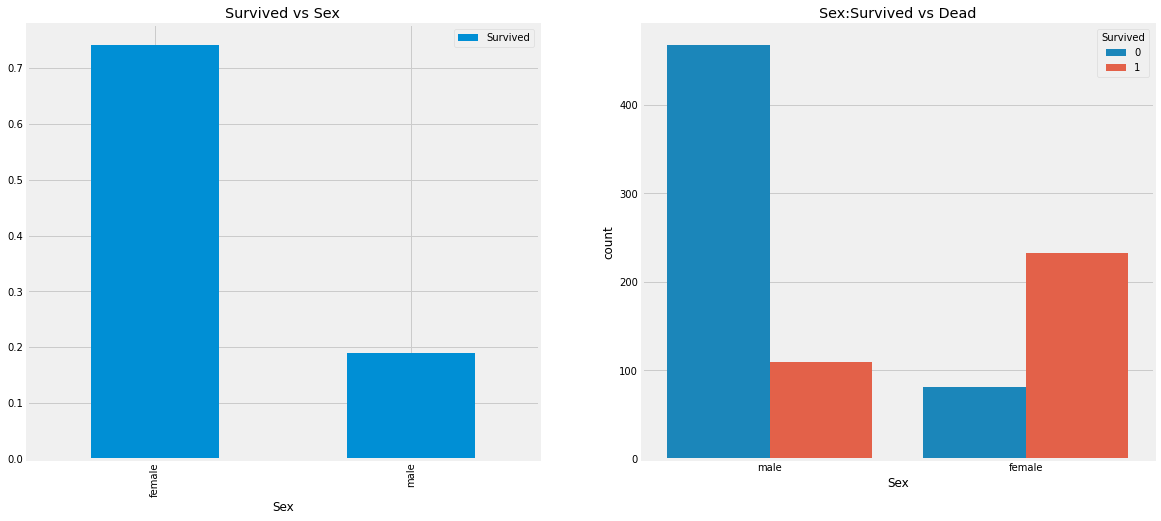

In [ ]:
f, ax=plt.subplots(1, 2, figsize=(15,5))

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])

ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

*The number of men on board was far greater than the number of women. However, the number of women who survived was almost twice the number of men who survived. The survival rate for **women on board was about 75% while for men it was 18-19%.** 👨🧟👩*

##### Pclass --> Ordinal Feature

In [ ]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


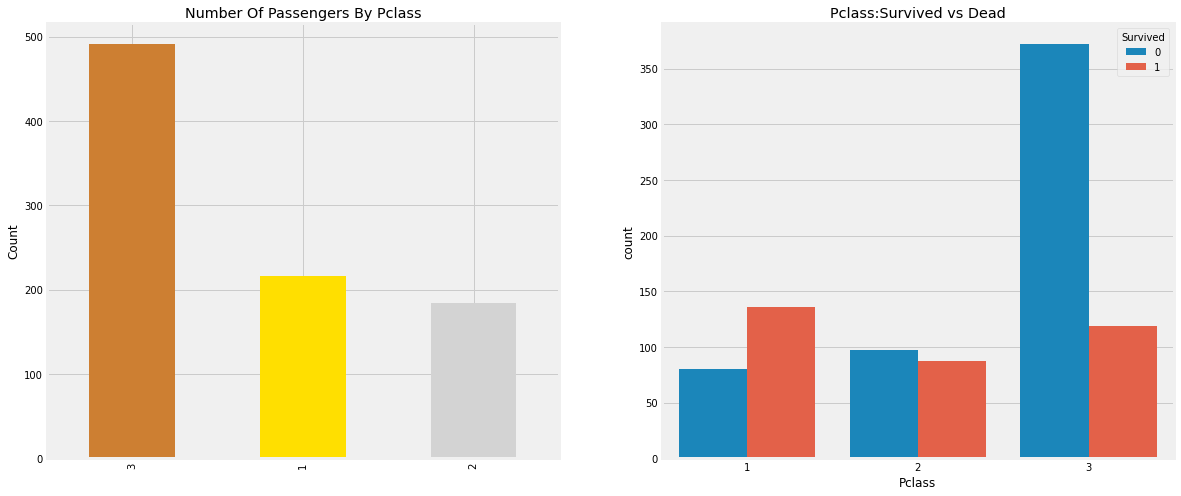

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(15,5))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])

ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

*People say **Money Can't Buy Everything.** But it can be clearly seen that Pclass 1 passengers are given very high priority during rescue. Although the number of Passengers in Pclass 3 is much higher, the number of their survival is still very low, around **25%.** For Pclass 1, the survival rate is around **63%** while for Pclass 2 it is around **48%.***

*So money and status are important. **Such a materialistic world** 😂😂😂*

In [ ]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

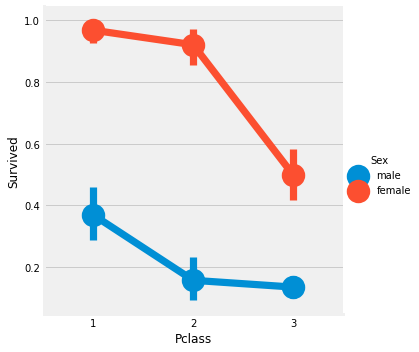

In [ ]:
sns.factorplot('Pclass','Survived', hue='Sex', data=data)
plt.show()

***FactorPlot** makes it easy to separate categorical values. Looking at the **CrossTab** and **FactorPlot**, it can be concluded that the survival of **Females from Pclass1** is around **95-96%**, as only 3 out of 94 Females from Pclass1 died.*

*It is clear that regardless of Pclass, Females are given first priority when it comes to rescue. Even Males from Pclass1 have a very low survival rate.*

##### Age --> Continous Feature

In [ ]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


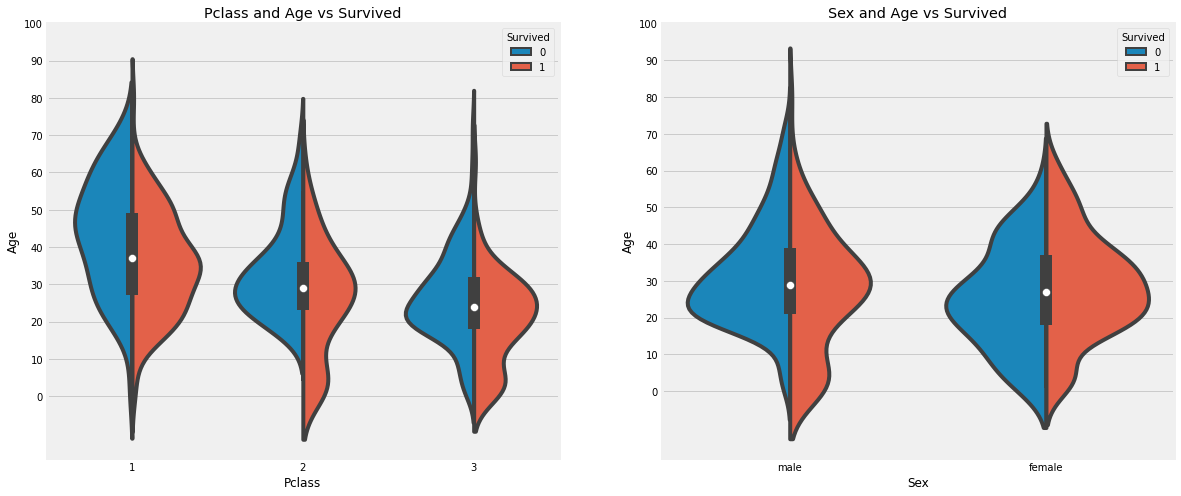

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])

ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])

ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

***Observations:***

*1. The number of children increases with Pclass, and the survival rate for passengers under Age 10 (i.e. children) looks good regardless of Pclass.*

*2. The survival chance for Passengers aged 20-50 from Pclass1 is high and even better for Females.*

*3. For males, the survival chance decreases with age.*

In [ ]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*The Age feature has **177** null values. To replace these NaN values, we can impute the average age.*

*The problem is, there are many people with different ages. Is there a way to find out the age group of the passengers?*

***BINGO!!!!**, we can check the **Name** feature. By looking at the characteristics, we can see that the names have greetings such as Mr or Mrs. Thus we can determine the average value of Mr and Mrs in each group.*

**''What's in a Name??''** ---> **Feature** 😀😀😀

In [ ]:
data['Initial']=0

for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # lets extract the Salutations

*Using Regex: **[A-Za-z]+)\.***

*So what it does is, looks for the string that lies between **A-Z or a-z** and is followed by **.(dot).***

In [ ]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') # checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


*There are some mistakes like Mlle, Mme which means Miss. So we have to replace.*

In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'], 
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean() # lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
# Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age']=46

In [ ]:
data.Age.isnull().any() # So no null values left finally

False

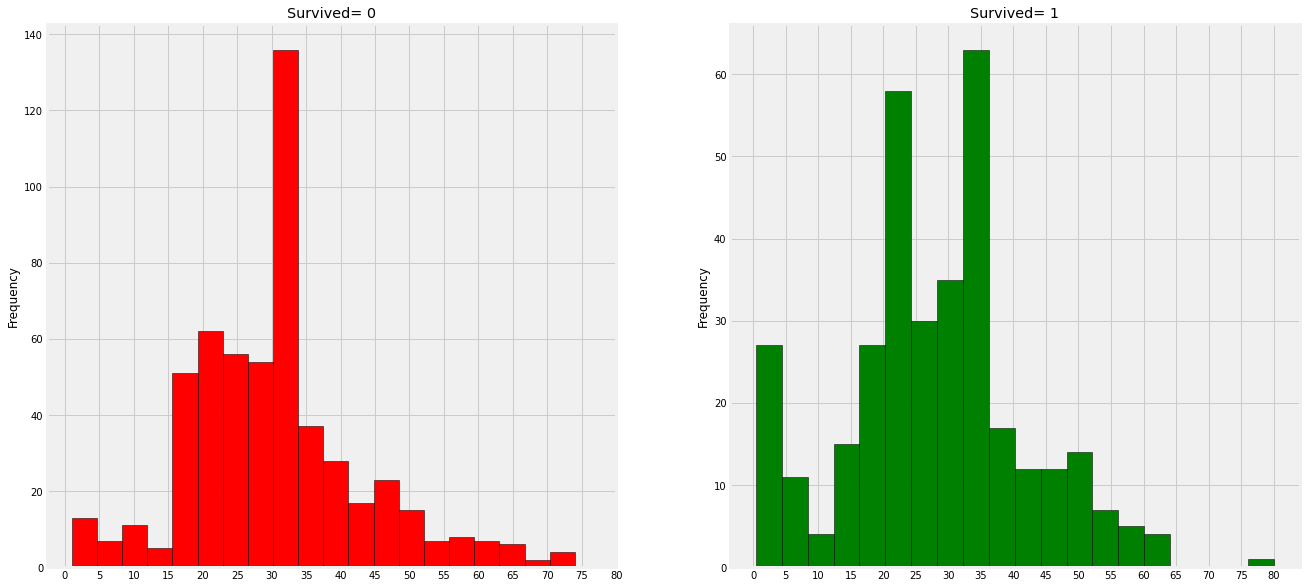

In [ ]:
f, ax=plt.subplots(1, 2, figsize=(20,10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')

ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')

ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

***Observations:***

*1. Toddlers (age <5) were rescued in large numbers (Women and Children First Policy).*

*2. The oldest passenger was rescued (80 years old).*

*3. The highest number of deaths were in the 30-40 age group.*

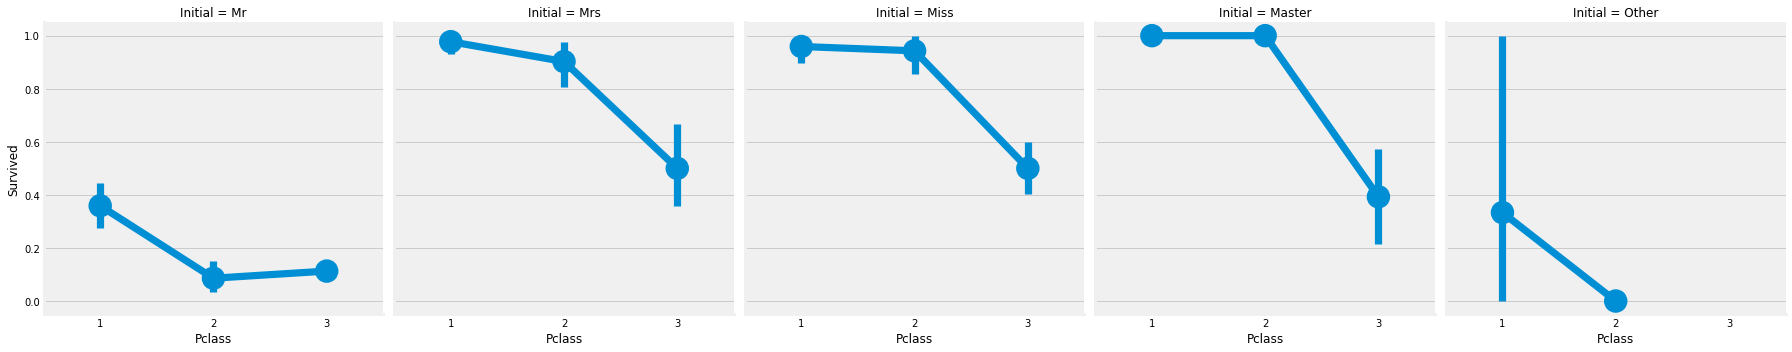

In [ ]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

*The first Women and Children policy applies regardless of class.*

##### Embarked --> Categorical Value

In [ ]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex,data.Survived], margins=True).style.background_gradient(cmap='summer_r')

*Peluang hidup berdasarkan pelabuhan embarkasi.*

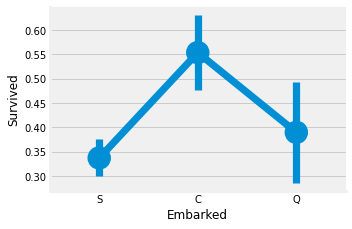

In [ ]:
sns.factorplot('Embarked', 'Survived', data=data)

fig = plt.gcf()
fig.set_size_inches(5,3)

plt.show()

*The probability of survival for Port C is highest at around 0.55 while it is lowest for S.*

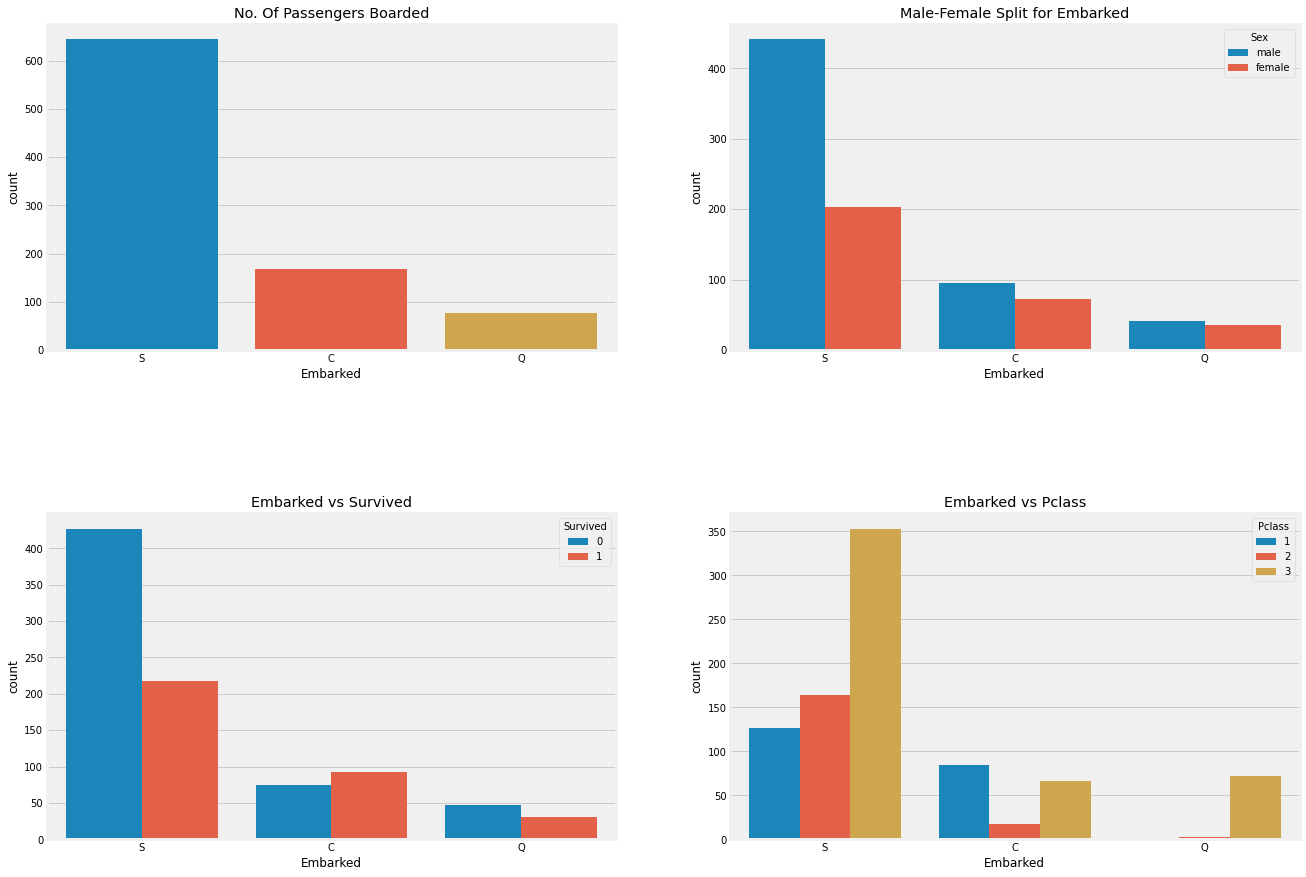

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

***Observations:***

*1. Most passengers boarded from S. Most of them were from Pclass3.*

*2. Passengers from C seemed lucky because most of them survived. The reason might be the rescue of all Pclass1 and Pclass2 Passengers.*

*3. Departure S where most of the rich people boarded. The chance of survival is still low here, that's because many passengers from Pclass3 around **81%** did not survive.*

*4. Port Q has almost 95% of passengers from Pclass3.*

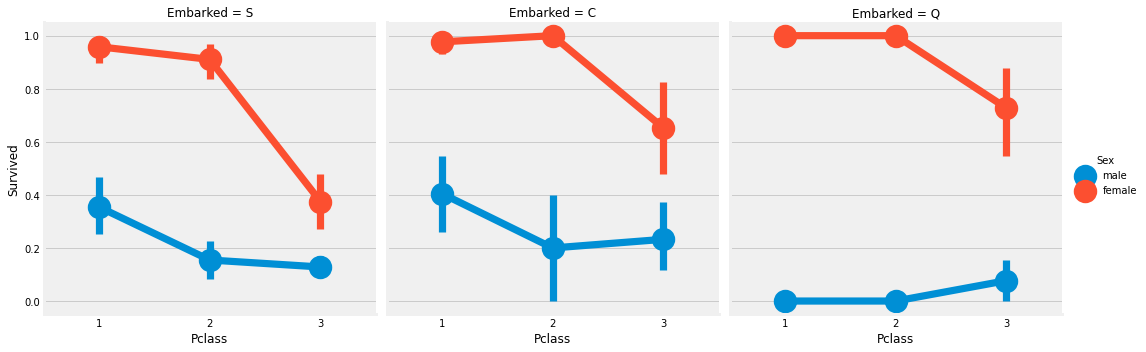

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

***Observations:***

*1. Survival rate is almost 1 for females for Pclass1 and Pclass2 regardless of Pclass.*

*2. Port S looks very unlucky for Pclass3 Passengers as survival rate for both males and females is very low.**(Money Matters)***

*3. Port Q looks the least attractive for Males, as almost all of them are from Pclass 3.*

*As we saw that maximum passengers boarded from Port S, we replace NaN with S.*

In [ ]:
data['Embarked'].fillna('S', inplace=True)

In [ ]:
data.Embarked.isnull().any() # Finally No NaN values

False

##### SibSip --> Discrete Feature

*This feature represents whether a person is alone or with his/her family members.*

*Sibling = brother, sister, stepbrother, stepsister*

*Spouse = husband, wife*

In [ ]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


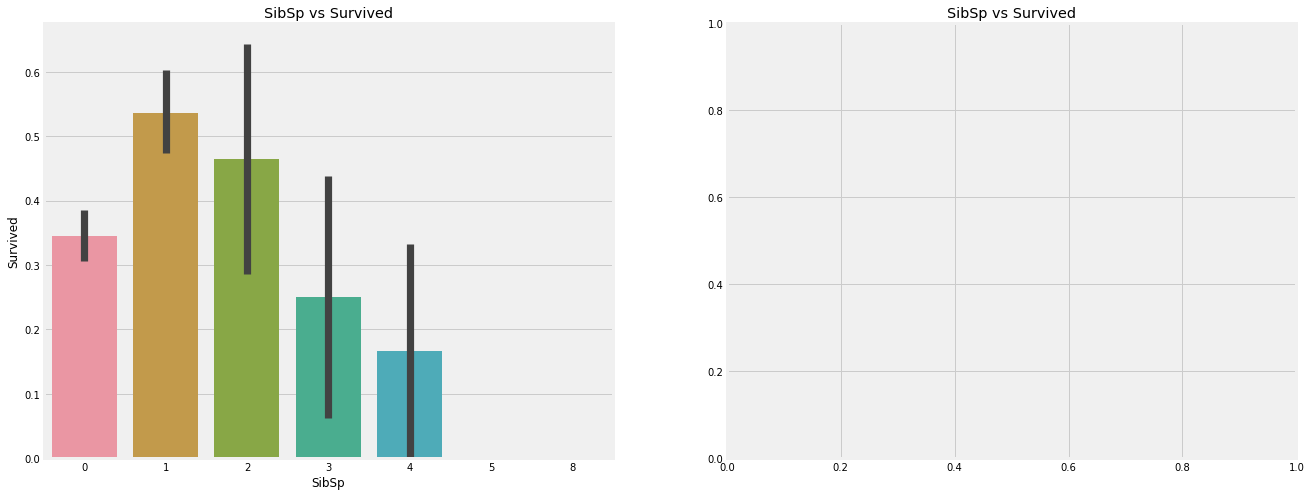

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20,8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [ ]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


***Observations:***

*From the barplot and factorplot it shows that if a passenger is alone in the ship without siblings, he has a survival rate of 34.5%. The graph roughly decreases as the number of siblings increases, which makes sense. That is, if I have a family, I will try to save them rather than save myself first. Surprisingly, the survival of a family with 5-8 members is **0%.** The reason might be Pclass?*

*The reason is **Pclass**. The crosstab shows that people with SibSp>3 are all in Pclass3. Almost all of the extended families in Pclass3 (>3) die.*

In [ ]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


*Crosstab shows again that the extended family is in Pclass3.*

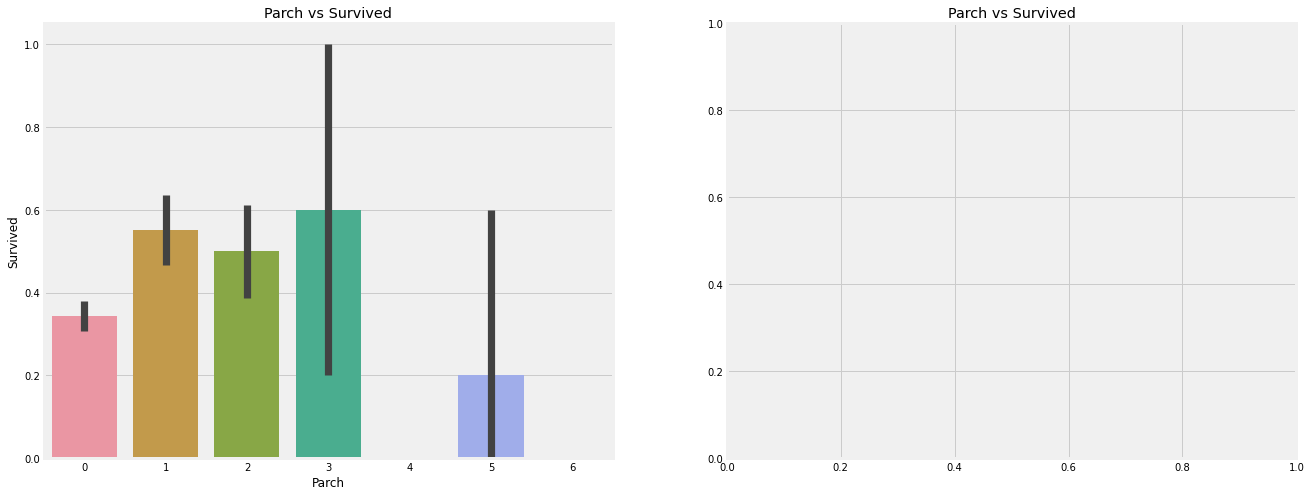

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20,8))

sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

***Observations:***

*Here too the results are very similar. Passengers with their parents on board have a greater chance of survival. However it decreases as the number increases. The chances of survival are good for someone with 1-3 parents on board. Being alone also proves to be fatal and the chances of survival decrease when someone has >4 parents on board.*

##### Fare --> Continous Feature

In [ ]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


*Tarif terendah adalah **0.0.** Wow!! tumpangan mewah gratis. 🤑🤑🤑*

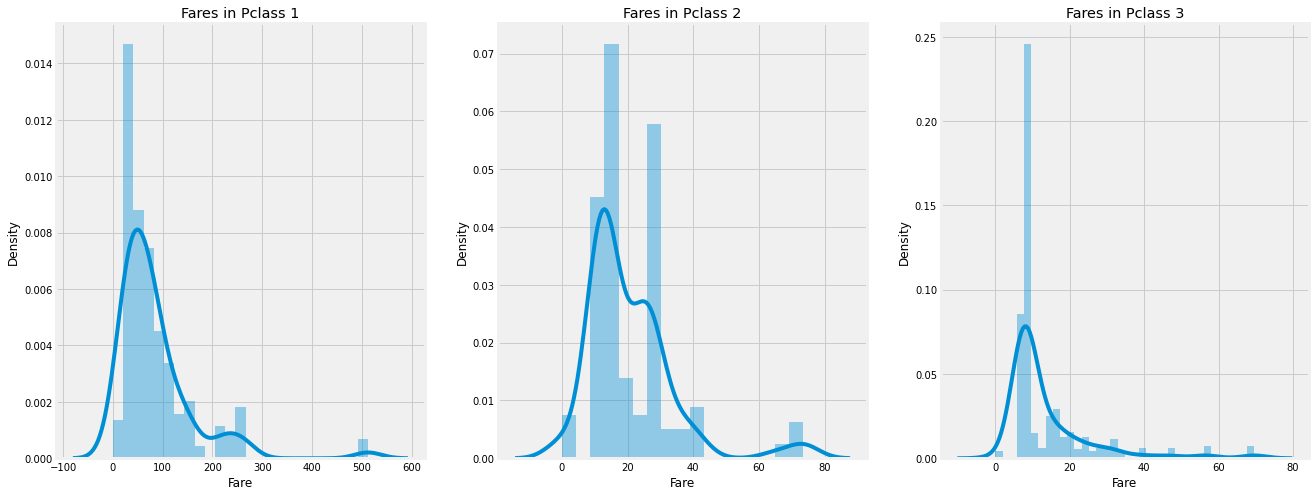

In [ ]:
f,ax = plt.subplots(1, 3, figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

*There is a large distribution in Passenger fares in Pclass1 and this distribution decreases as the standard decreases. Since this is also continuous, we can convert it to discrete values using binning.*

***Observations in a Nutshell for all features:***

*1. **Gender:** Females have higher survival chances than males.*

*2. **Pclass:** There is a visible trend that being a **1st class passenger** gives you better survival chances. The survival rate for **Pclass3 is very low.** For **females**, the survival chances of **Pclass1** are almost 1 and also high for those from **Pclass2.***

*3. **Age:** Children less than 5-10 years do have high chances of survival. Passengers between the age group of 15 to 35 have a slight chance.*

*4. **Embarked:** This is a very interesting feature. **The survival chances of C seem better than Pclass1 passengers in S.** Passengers in Q are all from **Pclass3.***

*5. **Parch+SibSp:** Having 1-2 siblings, spouse on board or 1-3 Parents shows higher chances than being alone or having a large family traveling.*

### Correlation between the Features

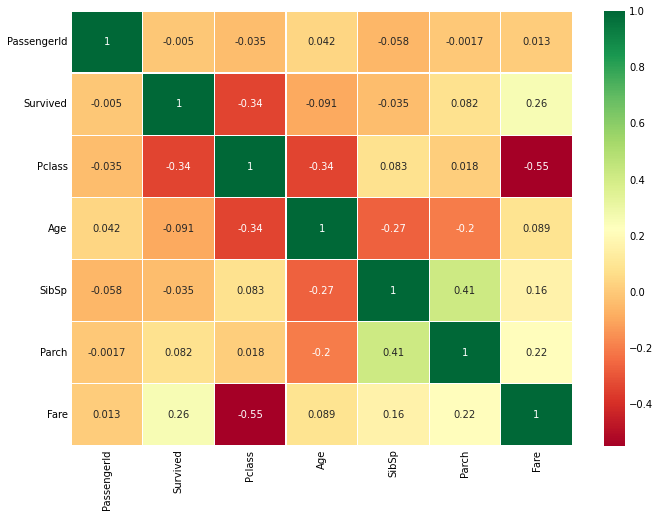

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) # data.corr() --> correlation matrix

fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

***Heatmap Interpretation***

*Correlation is only a numeric variable.*

***POSITIVE CORRELATION:** If **an increase in feature A causes an increase in feature B, then the two are positively correlated.** A value of **1 means a perfect positive correlation.***

***NEGATIVE CORRELATION:** If **an increase in feature A causes a decrease in feature B, then the two are negatively correlated.** A value of **-1 means a perfect negative correlation.***

*If two features are highly or perfectly correlated, such that an increase in one leads to an increase in the other. This means that the two features contain very similar information and very little or no difference in information. This feature is known as **MultiCollinearity** because both contain almost the same information.*

*From the heatmaps above, it can be seen that the features are not highly correlated. The highest correlation is between **SibSp and Parch which is 0.41.***